## ANLY 590 HW No.2
## Xi Yang

###   
### Problem No. 1
### Feedforward: Building a ReLU neural network
###  
### 1.1

![Skematic of Required Neural Network](1_1.png)


###    
### 1.2 

__Output from the neural network in 1.1__

$\Large
\begin{align}
\hat{y} =\sigma \{ & v_1 ReLU[\ w_{11} x_1 + w_{21} x_2 + b_1 ]\ \\
&+ v_2 ReLU[\ w_{12} x_1 + w_{22} x_2 + b_2 ]\ \\
&+ v_3 ReLU[\ w_{13} x_1 + w_{23} x_2 + b_3 ] + c \}
\end{align}$

where $\Large \sigma (a) = \frac{1}{1+e^{-a}}$ and $\large ReLU (b) = max(0, b)$

__Or in the form of matrix expression__

$\Large
\hat{y} = \sigma \{  ReLU [\ \vec{x} \cdot W + \vec{b} ]\ \cdot \vec{v} + \vec{c} \}$


###  

### 1.3


In [1]:
# Import package
import numpy as np

# Define the function to calculate the output for this neural network system
def ff_nn_ReLu(X, W, b, V, c):
    # Calculate the output from the hidden layer
    out_layer_1 = ReLU(np.dot(X,W) + b)
    
    # Calculate the final output and return
    out_final = sigmoid(np.dot(out_layer_1,V) + c)
    return out_final
    
# Define a ReLU function
def ReLU(b):
    return np.maximum(0,b)

# Define a sigmoid function
def sigmoid(a):
    sig_out = 1 / (1 + np.exp(-a))
    return sig_out
    

 
 ###  
 ### 1.4

In [2]:
# Input the input and weight arrays/matrices
X = np.array([[1,-1], [0, -1], [0, 1]])
W = np.array([[1,-1,0],[0,0,0.5]])
V = np.array([[1],[0],[-1]])
b = np.array([0,0,1])
c = np.array([1])

# Calculate the probabilities for each sample
prob = ff_nn_ReLu(X, W, b, V, c)

print('The probabilities for the three samples from the neural network system are: \n', prob)

The probabilities for the three samples from the neural network system are: 
 [[0.81757448]
 [0.62245933]
 [0.37754067]]



###   
###  Problem No.2
### Gradient Descent

###    
### 2.1

$\large
f(x,y) = (1-x^3) + 100 \times (y^2 - x)^2$
  
  
__Partial derivative of $f(x,y)$ with respect to $x$:__

$
\begin{align}
\large
\frac{\partial f(x,y)}{\partial x} &= -3x^2 + \frac{\partial [\ 100 \times (y^2 - x)^2 ]\ }{\partial (y^2 -x)} \cdot \frac{\partial (y^2 - x)}{\partial x} \\
&= -3x^2 + 200 \cdot (y^2 -x) \cdot (-1) \\
&= -3x^2 - 200y^2 + 200x
\end{align}
$
  
   
__Partial derivative of $f(x,y)$ with respect to $y$:__

$\begin{align}
\large
\frac{\partial f(x,y)}{\partial y} &= \frac{\partial [\ 100 \times (y^2 - x)^2 ]\ }{\partial (y^2 -x)} \cdot \frac{\partial (y^2 - x)}{\partial y} \\
&= 200 \cdot (y^2 -x) \cdot (2y) \\
&= 400 \cdot (y^3 - xy)
\end{align}$


###  
### 2.2

In [3]:
import numpy as np
# Write the non-convex two-variable function
def fun_22(x,y):
    return (1-x**3) + 100*(y**2 - x)**2

# Generate x and y within the range of (-10,10)
x_22 = np.linspace(-1.5, 1.5, 200)
y_22 = np.linspace(-1.5, 1.5, 200)

# Generate meshgrid of x and y for contour plot
x_22, y_22 = np.meshgrid(x_22, y_22)

# Calculate Z value based on pairs of x and y
z_22 = fun_22(x_22, y_22)
    

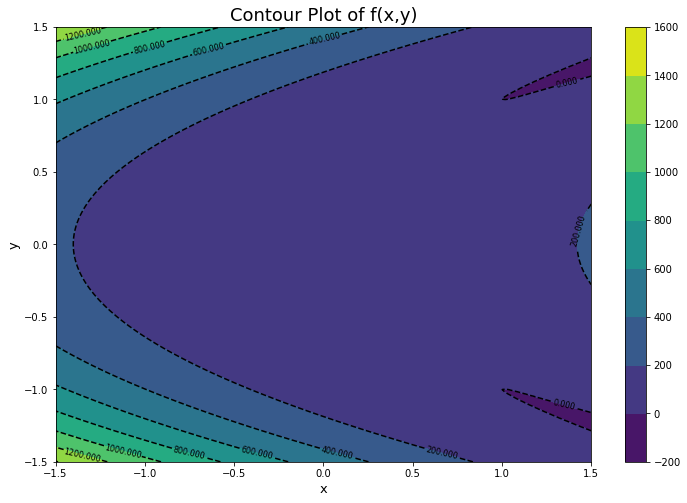

In [4]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline  

# Generate Contour Plot of the defined function
plt.figure(figsize=(12,8))
cntf = plt.contourf(x_22, y_22, z_22)
contours = plt.contour(x_22, y_22, z_22, 8, colors='black', linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=8)

plt.title('Contour Plot of f(x,y)', fontsize = 18)
plt.xlabel('x',fontsize=13)
plt.ylabel('y',fontsize=13)
plt.colorbar(cntf)
plt.show()

###  
### 2.3 Gradient Descent

In [5]:
# Defien the gradient descent function for this problem
def grad_desc_23(init_x, init_y, learning_rate = 0.001, iterations = 50):
    # Use the initialize coordinate as the first point
    temp_x = init_x
    temp_y = init_y
    
    # Initialize the trajectory lists
    x_traj = [temp_x]
    y_traj = [temp_y]
    
    # Iterate through required iteration numbers
    for i in range(iterations):
        # Calculate gradient
        grad_x = -3 * temp_x**2 - 200 * temp_y**2 + 200 * temp_x
        grad_y = 400 * (temp_y**3 - temp_x*temp_y)
        
        # Calculate new (x,y) coordinate
        temp_x = temp_x - learning_rate * grad_x
        temp_y = temp_y - learning_rate * grad_y
        
        #print(temp_x, '\t', temp_y)
        # Record (x,y) trajectory
        x_traj.append(temp_x)
        y_traj.append(temp_y)
        
    # Return the trajectory path
    return np.array([x_traj, y_traj])
        
    


  
__Learning Rate of 0.0001__

In [6]:
# Set interation number
n_iter_23 = 200

# Calculate trajectory path
path_23_1 = grad_desc_23(-1, -1, learning_rate = 0.0001, iterations = n_iter_23)


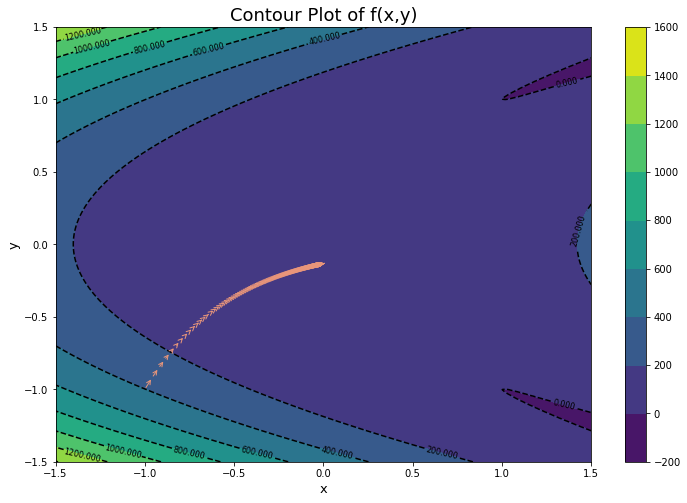

In [7]:
# Generate Contour Plot of the defined function
plt.figure(figsize=(12,8))
cntf = plt.contourf(x_22, y_22, z_22)
contours = plt.contour(x_22, y_22, z_22, 8, colors='black', linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=8)

for i in range(n_iter_23 - 1):
    plt.annotate('', xy=tuple(path_23_1[:, i+1]), xytext=tuple(path_23_1[:, i]),
                 arrowprops={'arrowstyle': '->', 'color': 'darksalmon', 'lw': 1},
                 va='center', ha='center')
    
plt.title('Contour Plot of f(x,y)', fontsize = 18)
plt.xlabel('x',fontsize=13)
plt.ylabel('y',fontsize=13)
plt.colorbar(cntf)
plt.show()

__Learning Rate of 0.0005__

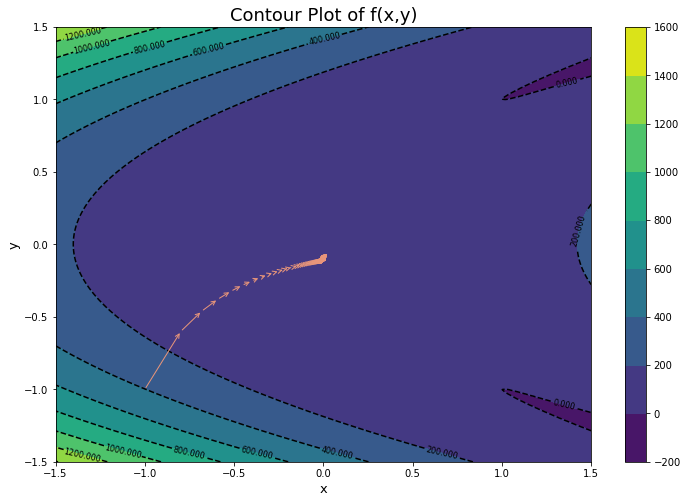

In [8]:
# Calculate trajectory path
path_23_2 = grad_desc_23(-1, -1, learning_rate = 0.0005, iterations = n_iter_23)

# Generate Contour Plot of the defined function
plt.figure(figsize=(12,8))
cntf = plt.contourf(x_22, y_22, z_22)
contours = plt.contour(x_22, y_22, z_22, 8, colors='black', linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=8)

for i in range(n_iter_23 - 1):
    plt.annotate('', xy=tuple(path_23_2[:, i+1]), xytext=tuple(path_23_2[:, i]),
                 arrowprops={'arrowstyle': '->', 'color': 'darksalmon', 'lw': 1},
                 va='center', ha='center')
    
plt.title('Contour Plot of f(x,y)', fontsize = 18)
plt.xlabel('x',fontsize=13)
plt.ylabel('y',fontsize=13)
plt.colorbar(cntf)
plt.show()

__Learning Rate of 0.002__

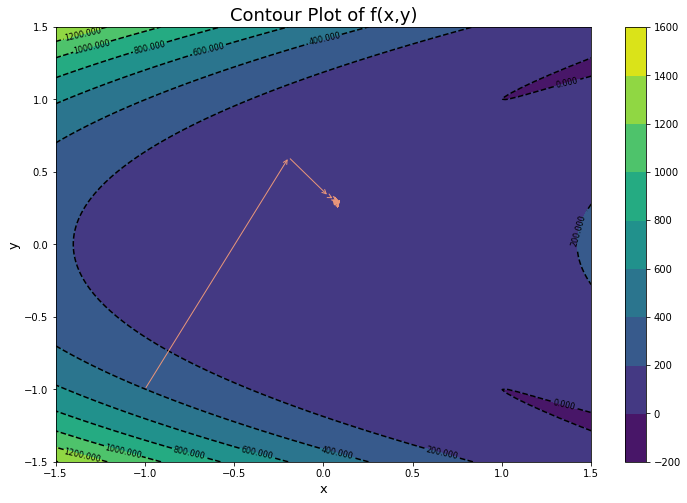

In [9]:
# Calculate trajectory path
path_23_3 = grad_desc_23(-1, -1, learning_rate = 0.002, iterations = n_iter_23)

# Generate Contour Plot of the defined function
plt.figure(figsize=(12,8))
cntf = plt.contourf(x_22, y_22, z_22)
contours = plt.contour(x_22, y_22, z_22, 8, colors='black', linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=8)

for i in range(n_iter_23 - 1):
    plt.annotate('', xy=tuple(path_23_3[:, i+1]), xytext=tuple(path_23_3[:, i]),
                 arrowprops={'arrowstyle': '->', 'color': 'darksalmon', 'lw': 1},
                 va='center', ha='center')
    
plt.title('Contour Plot of f(x,y)', fontsize = 18)
plt.xlabel('x',fontsize=13)
plt.ylabel('y',fontsize=13)
plt.colorbar(cntf)
plt.show()

###    
### 2.4 Gradient Descent with Momentem

In [10]:
# Defien the gradient descent function for this problem
def grad_desc_mom_24(init_x, init_y, alpha = 0.001,epsilon = 0.001, iterations = 50):
    # Use the initialize coordinate as the first point
    temp_x = init_x
    temp_y = init_y
    
    # Initialize the trajectory lists
    x_traj = [temp_x]
    y_traj = [temp_y]
    
    # Initialize the velocity arrays
    v_x = np.zeros(iterations +1)
    v_y = np.zeros(iterations +1)
    
    # Iterate through required iteration numbers
    for i in range(iterations):
        
        # Calculate gradient
        grad_x = -3 * temp_x**2 - 200 * temp_y**2 + 200 * temp_x
        grad_y = 400 * (temp_y**3 - temp_x*temp_y)
        
        # Calculate the temporary velocity
        temp_v_x = alpha * v_x[i] + epsilon * grad_x
        temp_v_y = alpha * v_y[i] + epsilon * grad_y
        
        #print(temp_v_x, '\t', temp_v_y)
        # Record the velocities to the array
        v_x[i+1] = temp_v_x
        v_y[i+1] = temp_v_y
        
        # Calculate new (x,y) coordinate
        temp_x = temp_x - temp_v_x
        temp_y = temp_y - temp_v_y
        
        #print(temp_x, '\t', temp_y)
        # Record (x,y) trajectory
        x_traj.append(temp_x)
        y_traj.append(temp_y)
        
    # Return the trajectory path
    return np.array([x_traj, y_traj])



__Case No.1 $\alpha = 0.01$ and $\epsilon = 0.0001$__

In [11]:
# Set iteration number
n_iter_24 = 200

# Calculate trajectory path
path_24_1 = grad_desc_mom_24(-1.2, -1.2, alpha = 0.01,epsilon = 0.0001, iterations = n_iter_24)

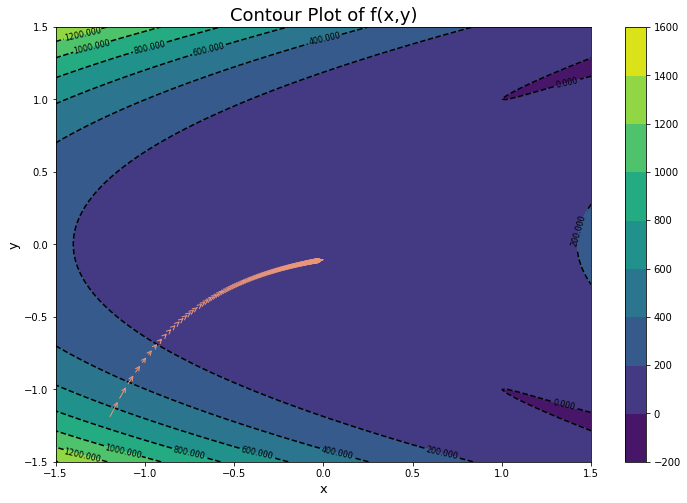

In [12]:
# Generate Contour Plot of the defined function
plt.figure(figsize=(12,8))
cntf = plt.contourf(x_22, y_22, z_22)
contours = plt.contour(x_22, y_22, z_22, 8, colors='black', linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=8)

for i in range(n_iter_24 - 1):
    plt.annotate('', xy=tuple(path_24_1[:, i+1]), xytext=tuple(path_24_1[:, i]),
                 arrowprops={'arrowstyle': '->', 'color': 'darksalmon', 'lw': 1},
                 va='center', ha='center')
    
plt.title('Contour Plot of f(x,y)', fontsize = 18)
plt.xlabel('x',fontsize=13)
plt.ylabel('y',fontsize=13)
plt.colorbar(cntf)
plt.show()



__Case No.2 $\alpha = 0.01$ and $\epsilon = 0.001$__

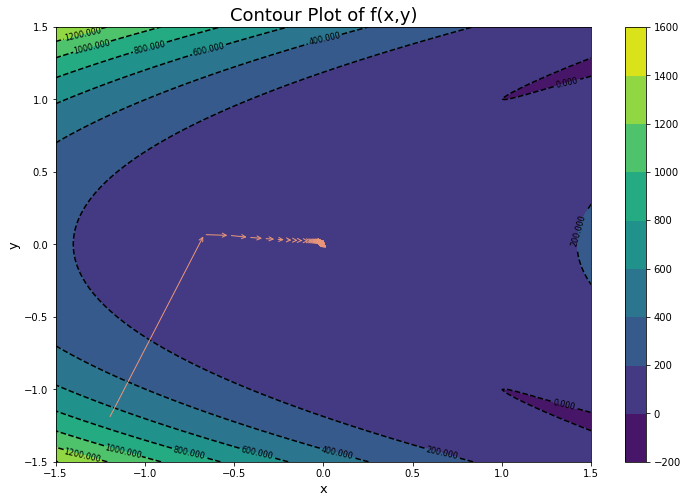

In [13]:
# Calculate trajectory path
path_24_1 = grad_desc_mom_24(-1.2, -1.2, alpha = 0.01,epsilon = 0.001, iterations = n_iter_24)

# Generate Contour Plot of the defined function
plt.figure(figsize=(12,8))
cntf = plt.contourf(x_22, y_22, z_22)
contours = plt.contour(x_22, y_22, z_22, 8, colors='black', linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=8)

for i in range(n_iter_24 - 1):
    plt.annotate('', xy=tuple(path_24_1[:, i+1]), xytext=tuple(path_24_1[:, i]),
                 arrowprops={'arrowstyle': '->', 'color': 'darksalmon', 'lw': 1},
                 va='center', ha='center')
    
plt.title('Contour Plot of f(x,y)', fontsize = 18)
plt.xlabel('x',fontsize=13)
plt.ylabel('y',fontsize=13)
plt.colorbar(cntf)
plt.show()


__Case No.3 $\alpha = 0.5$ and $\epsilon = 0.001$__

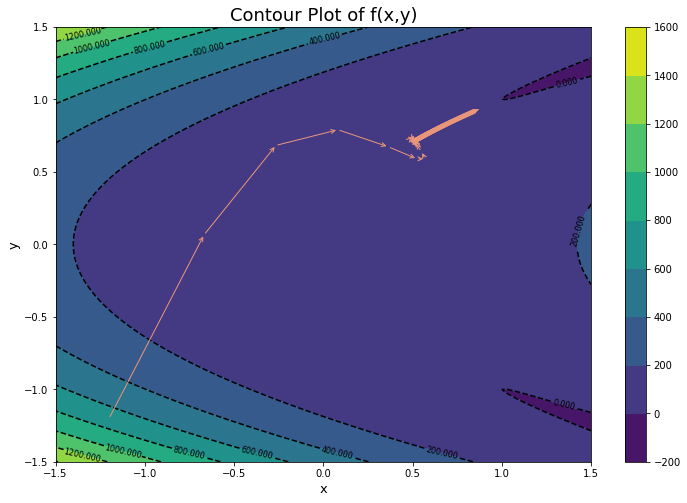

In [14]:
# Calculate trajectory path
path_24_1 = grad_desc_mom_24(-1.2, -1.2, alpha = 0.5,epsilon = 0.001, iterations = n_iter_24)

# Generate Contour Plot of the defined function
plt.figure(figsize=(12,8))
cntf = plt.contourf(x_22, y_22, z_22)
contours = plt.contour(x_22, y_22, z_22, 8, colors='black', linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=8)

for i in range(n_iter_24 - 1):
    plt.annotate('', xy=tuple(path_24_1[:, i+1]), xytext=tuple(path_24_1[:, i]),
                 arrowprops={'arrowstyle': '->', 'color': 'darksalmon', 'lw': 1},
                 va='center', ha='center')
    
plt.title('Contour Plot of f(x,y)', fontsize = 18)
plt.xlabel('x',fontsize=13)
plt.ylabel('y',fontsize=13)
plt.colorbar(cntf)
plt.show()


__Case No.4 $\alpha = 0.5$ and $\epsilon = 0.001$__

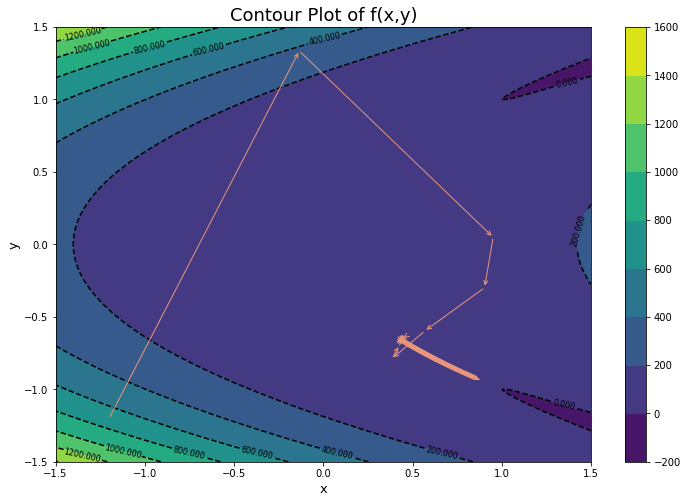

In [15]:
# Calculate trajectory path
path_24_1 = grad_desc_mom_24(-1.2, -1.2, alpha = 0.3,epsilon = 0.002, iterations = n_iter_24)

# Generate Contour Plot of the defined function
plt.figure(figsize=(12,8))
cntf = plt.contourf(x_22, y_22, z_22)
contours = plt.contour(x_22, y_22, z_22, 8, colors='black', linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=8)

for i in range(n_iter_24 - 1):
    plt.annotate('', xy=tuple(path_24_1[:, i+1]), xytext=tuple(path_24_1[:, i]),
                 arrowprops={'arrowstyle': '->', 'color': 'darksalmon', 'lw': 1},
                 va='center', ha='center')
    
plt.title('Contour Plot of f(x,y)', fontsize = 18)
plt.xlabel('x',fontsize=13)
plt.ylabel('y',fontsize=13)
plt.colorbar(cntf)
plt.show()


###   
###  
### Problem No.3
### Backprop

###   
### 3.1

The loss function of binary cross entropy is:  
$L = -y_i log(\hat{y_i}) - (1 - y_i) log(1-\hat{y_i})$

The derivative of loss function with respect to the output of the output layer for observation $i$ is:  
$ \frac{d L}{d \hat{y_i}} = - (\frac{y_i}{\hat{y_i}} - \frac{1-y_i}{1-\hat{y_i}})$

The output from the output layer for observation $i$ is:  
$\begin{align*}
\hat{y_i} =\sigma \{ & v_1 ReLU[\ w_{11} x_{1,i} + w_{21} x_{2,i} + b_1 ]\ \\
&+ v_2 ReLU[\ w_{12} x_{1,i} + w_{22} x_{2,i} + b_2 ]\ \\
&+ v_3 ReLU[\ w_{13} x_{1,i} + w_{23} x_{2,i} + b_3 ]\ + c \}
\end{align*}$

where $ \sigma (a) = \frac{1}{1+e^{-a}}$ and $ ReLU (b) = max(0, b)$  

  
The input into the output layer is:  
$\begin{align*}
y_{i, in} = & v_1 ReLU[\ w_{11} x_{1,i} + w_{21} x_{2,i} + b_1 ]\ \\
&+ v_2 ReLU[\ w_{12} x_{1,i} + w_{22} x_{2,i} + b_2 ]\ \\
&+ v_3 ReLU[\ w_{13} x_{1,i} + w_{23} x_{2,i} + b_3 ] + c
\end{align*}$  
  
The derivative of output of the output layer w.r.t the input $y_{i,in}$ into the output layer is:  
$\frac{d \hat{y_i}}{d y_{i, in}} = \sigma ( y_{i, in} ) [ 1-\sigma (y_{i, in}) ]$
      
      
__For the bias term $c$, the derivative of Loss function w.r.t the bias term of the output node is:__  
$\frac{\partial L}{\partial c} = \frac{d L}{d \hat{y_i}} \frac{d \hat{y_i}}{d y_{i, in}} \frac{\partial y_{i,in}}{\partial c} = - (\frac{y_i}{\hat{y_i}} - \frac{1-y_i}{1-\hat{y_i}}) \cdot \sigma ( y_{i, in} ) [ 1-\sigma (y_{i, in})]$  
  
    

__For the weight parameters $v_k$ for $k=1,2,3$, the derivative of Loss function w.r.t $v_k$ is:__   
$\frac{\partial L}{\partial v_k} = \frac{d L}{d \hat{y_i}} \frac{d \hat{y_i}}{d y_{i, in}} \frac{\partial y_{i,in}}{\partial v_k} = - (\frac{y_i}{\hat{y_i}} - \frac{1-y_i}{1-\hat{y_i}}) \cdot \sigma ( y_{i, in} ) [\ 1-\sigma (y_{i, in}) ]\ \cdot h_{k,out}$  
  
where $h_k$ is the output from the corresponding neurons in the hidden layer:   
  
$h_{k,out} = ReLU[ w_{1k} x_{1,i} + w_{2k} x_{2,i} + b_k ]$

The input into each neuron in the hidden layer is:   
$h_{k,in} =  w_{1k} x_{1,i} + w_{2k} x_{2,i} + b_k$

__For the bias terms for the hidden layer, the derivative of Loss functino w.r.t $b_k$ for each hidden neuron is:__  

$\frac{\partial L}{\partial b_k} = \frac{d L}{d \hat{y_i}} \frac{d \hat{y_i}}{d y_{i, in}} \frac{\partial y_{i,in}}{\partial h_{k,out}} \frac{\partial h_{k,out}}{h_{k, in}} \frac{\partial h_{k,in}}{\partial b_k}$  


For the derivative for ReLU function output of each hidden neuron w.r.t the input of the hidden neuron, we have:  
$\frac{\partial h_{k,out}}{h_{k, in}} = \begin{cases} 1 \ if \ h_{k, in} > 0 \\ 0 \ otherwise \end{cases} $  
  
Thus, when $h_{k, in} > 0$, the derivative of Loss functino w.r.t $b_k$ for each hidden neuron is:    
$\frac{\partial L}{\partial b_k} = \frac{d L}{d \hat{y_i}} \frac{d \hat{y_i}}{d y_{i, in}} \frac{\partial y_{i,in}}{\partial h_{k,out}} \frac{\partial h_{k,out}}{h_{k, in}} \frac{\partial h_{k,in}}{\partial b_k} = - (\frac{y_i}{\hat{y_i}} - \frac{1-y_i}{1-\hat{y_i}}) \cdot \sigma ( y_{i, in} ) [\ 1-\sigma (y_{i, in}) ]\ \cdot v_k$  
  
Otherwise,  
$ \frac{\partial L}{\partial b_k} = 0$

__For the weight parameters for the hidden layer, the derivative of Loss function w.r.t $w_{j,k}$ (that is the weight parameter from input $x_j$ for $j = 1,2$ to hidden neuron $h_k$ for $k=1,2,3$) is:__  
$\frac{\partial L}{\partial w_{j,k}} = \frac{d L}{d \hat{y_i}} \frac{d \hat{y_i}}{d y_{i, in}} \frac{\partial y_{i,in}}{\partial h_{k,out}} \frac{\partial h_{k,out}}{h_{k, in}} \frac{\partial h_{k,in}}{\partial b_k}$  
  
Still using the derivative for ReLU function property shown above, we get that when $h_{k, in} > 0$, the derivative of Loss functino w.r.t w_{j,k} for each hidden neuron is:    

$\frac{\partial L}{\partial w_{j,k}} = \frac{d L}{d \hat{y_i}} \frac{d \hat{y_i}}{d y_{i, in}} \frac{\partial y_{i,in}}{\partial h_{k,out}} \frac{\partial h_{k,out}}{h_{k, in}} \frac{\partial h_{k,in}}{\partial w_{j,k}} = - (\frac{y_i}{\hat{y_i}} - \frac{1-y_i}{1-\hat{y_i}}) \cdot \sigma ( y_{i, in} ) [\ 1-\sigma (y_{i, in}) ]\ \cdot v_k \cdot x_j$  
  
Otherwise,  
$\frac{\partial L}{\partial w_{j,k}} = 0$


###   
### 3.2

###  
__Firstly, we need to define some dependency functions for the required grad_f function to calculate the gradient of the parameters.__

In [16]:
# Import package
import numpy as np

# Define the function to calculate the output for this neural network system
def ff_nn_ReLu(X, W, b, V, c):
    # Calculate the output from the hidden layer
    out_layer_1 = ReLU(np.dot(X,W) + b)
    
    # Calculate the final output and return
    y_in = np.dot(out_layer_1,V) + c
    out_final = sigmoid(y_in)
    return out_final, np.reshape(y_in, (len(y_in),1)), out_layer_1

# Define a ReLU function
def ReLU(b):
    return np.maximum(0,b)

# Define the derivative of ReLU function
def d_ReLU(h_k):
    return h_k > 0

# Define a sigmoid function
def sigmoid(a):
    sig_out = 1 / (1 + np.exp(-a))
    return sig_out

# Define the derivative of sigmoid function
def d_sig(y_in):
    return sigmoid(y_in) * (1 - sigmoid(y_in))

# Define the loss function
def loss_fun(y, y_hat):
    return sum(list(-y * np.log(y_hat) - (1-y) * np.log(1-y_hat)))

# Define the derivative of the loss function
def d_loss(y, y_hat):
    return -(y/y_hat - (1-y)/(1-y_hat))



__Here the grad_f function is defined which takes in the four parameter matrices/vectors as well as X matrix and true y vector, and output the gradient of the parameters.__

In [17]:
# Define a function that calculates the gradients of the parameters for this problem
def grad_f(X, W, b, V, c, y):
    # Caculate the forawrd prediction y_hat
    # Calculate the input into the output layer y_in
    # Calculate the outputs from the hidden layer h_out
    y_hat, y_in, h_out = ff_nn_ReLu(X, W, b, V, c)
    
    # Calculate the derivative of Loss function w.r.t input into the output layer
    dL_dy_in = d_loss(y, y_hat) * d_sig(y_in)
    
    # Calculate the derivative of Loss function w.r.t bias terms c
    #     in the output layer
    dL_dc = np.sum(dL_dy_in)
    
    # Calculate the derivative of Loss function w.r.t weights vector V
    dL_dv = np.dot(h_out.T, dL_dy_in)
    
    # Calculate the derivative of Loss function w.r.t biases term vector b
    dL_db = (np.dot(dL_dy_in, V.T) * d_ReLU(h_out)).sum(axis=0)
    
    # Calculate the derivative of Loss function w.r.t weights matrix W
    dL_dw = np.dot(X.T, np.dot(dL_dy_in, V.T) * d_ReLU(h_out))
    
    # Return the gradients of the parameters
    return dL_dc, dL_dv, dL_db, dL_dw

###  
### 3.3

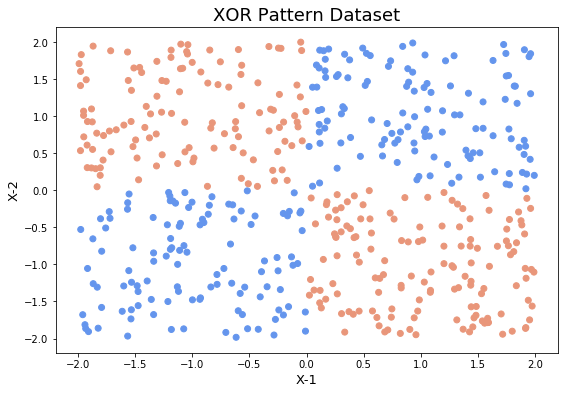

In [18]:
# Import needed packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

# Set up random seed to reproduce the results
np.random.seed(6261)

# Set up number of points of the dataset
n_4 = 500

# Generate synthetic dataset with the XOR pattern
X_4 = np.random.uniform(low=-2,high=2,size=n_4 * 2).reshape((n_4,2))
Y_4 = np.reshape(np.zeros(n_4), (n_4,1))
Y_4[np.logical_and(X_4[:,0]>0 , X_4[:,1]>0)]=1
Y_4[np.logical_and(X_4[:,0]<0 , X_4[:,1]<0)]=1

# Plot the synthetic dataset for checking
plt.figure(figsize=(9,6))
plt.scatter(X_4[:,0], X_4[:,1], c= ['darksalmon' if k == 0 else 'cornflowerblue' for k in Y_4])
plt.title('XOR Pattern Dataset', fontsize = 18)
plt.xlabel('X-1',fontsize=13)
plt.ylabel('X-2',fontsize=13)
plt.show()

###   
### 3.4
###  

__ Define the gradient descent function here that takes in the X matrix, true Y vector, iteration numbers, learning rate, and the choice of whether to return the parameter after last iteration.__

In [19]:
# Define the gradient descent function for this problem
def grad_descent_4(X_mat, Y_vec,  iterations=200, learning_rate=1e-4, ret_last = False):
    # Generate the initial guess for the parameters of the neural network
    W = W_init = np.reshape(np.random.uniform(-.1,.1,size=6), (2,3))
    b = b_init = np.reshape(np.random.uniform(-.1,.1,size=3), (1,3))
    V = V_init = np.reshape(np.random.uniform(-.1,.1,size=3), (3,1))
    c = c_init = np.random.uniform(-.1,.1,size=1)
    
    # Caculate the initial guess y_hat from the neural network
    init_y_hat, _, _ = ff_nn_ReLu(X_mat, W_init, b_init, V_init, c_init)
    y_hat = init_y_hat
    
    # Calculate the initial loss and record it to the loss_list
    init_loss = loss_fun(Y_vec, init_y_hat)
    loss_list = [init_loss]
    
    # Perform iteration based on set iteration numbers
    for i in range(iterations):
        # Calcualte the gradient of current parameter set
        dL_dc, dL_dv, dL_db, dL_dw = grad_f(X_mat, W, b, V, c, Y_vec)
        
        # Update the parameter matrix/vectors based on gradient descent
        W = W - learning_rate * dL_dw
        b = b - learning_rate * dL_db
        V = V - learning_rate * dL_dv
        c = c - learning_rate * dL_dc
        
        # Calculate the current prediction y_hat based on updated parameters
        temp_y_hat, _, _ = ff_nn_ReLu(X_mat, W, b, V, c)
        
        # Calculate current loss and append it to the loss list
        loss = loss_fun(Y_vec, temp_y_hat)
        loss_list.append(loss)
    
    # Determine whether to return the last set of parameters with the loss_list
    #     or just returning the loss_list
    if ret_last == True:
        return W, b, V, c, loss_list
    else:
        return loss_list
    
    

__ Perform gradient descent with 15000 iterations and 0.0001 learning rate to fit the neural network.__

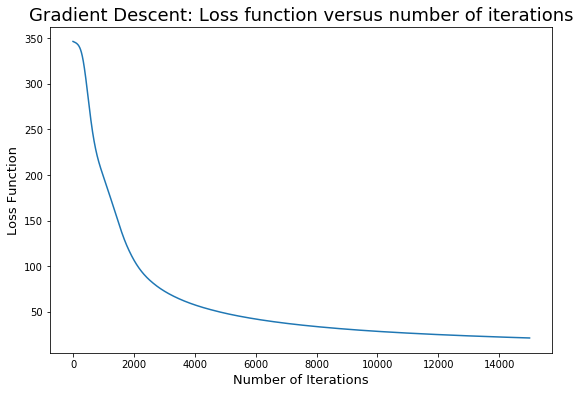

In [20]:
# Using gradient descent to calculate parameter matrix/vectors and record loss_list
W_4_1, b_4_1, V_4_1, c_4_1, loss_4_1 = grad_descent_4(X_4, Y_4, iterations=15000, 
                                                      learning_rate=1e-4, ret_last = True)

# Plot loss function versus number of iterations
plt.figure(figsize=(9,6))
plt.plot(loss_4_1)
plt.title('Gradient Descent: Loss function versus number of iterations', fontsize = 18)
plt.xlabel('Number of Iterations',fontsize=13)
plt.ylabel('Loss Function',fontsize=13)
plt.show()

###  
### 3.5


In [21]:
# Define the gradient descent function for this problem
def grad_descent_mom_4(X_mat, Y_vec,  iterations=200, alpha = 0.3,epsilon = 0.002, ret_last = False):
    # Generate the initial guess for the parameters of the neural network
    W = W_init = np.reshape(np.random.uniform(-.1,.1,size=6), (2,3))
    b = b_init = np.reshape(np.random.uniform(-.1,.1,size=3), (1,3))
    V = V_init = np.reshape(np.random.uniform(-.1,.1,size=3), (3,1))
    c = c_init = np.random.uniform(-.1,.1,size=1)
    
    # Caculate the initial guess y_hat from the neural network
    init_y_hat, _, _ = ff_nn_ReLu(X_mat, W_init, b_init, V_init, c_init)
    y_hat = init_y_hat
    
    # Calculate the initial loss and record it to the loss_list
    init_loss = loss_fun(Y_vec, init_y_hat)
    loss_list = [init_loss]
    
    v_W = np.reshape(np.zeros(6), (2,3))
    v_b = np.reshape(np.zeros(3), (1,3))
    v_V = np.reshape(np.zeros(3), (3,1))
    v_c = 0
    
    # Perform iteration based on set iteration numbers
    for i in range(iterations):
        # Calcualte the gradient of current parameter set
        dL_dc, dL_dv, dL_db, dL_dw = grad_f(X_mat, W, b, V, c, Y_vec)
        
        # Calculate the velocity
        v_W = alpha * v_W + epsilon * dL_dw
        v_b = alpha * v_b + epsilon * dL_db
        v_V = alpha * v_V + epsilon * dL_dv
        v_c = alpha * v_c + epsilon * dL_dc
        
        
        # Update the parameter matrix/vectors based on gradient descent
        W = W - v_W
        b = b - v_b
        V = V - v_V
        c = c - v_c
        
        # Calculate the current prediction y_hat based on updated parameters
        temp_y_hat, _, _ = ff_nn_ReLu(X_mat, W, b, V, c)
        
        # Calculate current loss and append it to the loss list
        loss = loss_fun(Y_vec, temp_y_hat)
        loss_list.append(loss)
    
    # Determine whether to return the last set of parameters with the loss_list
    #     or just returning the loss_list
    if ret_last == True:
        return W, b, V, c, loss_list
    else:
        return loss_list


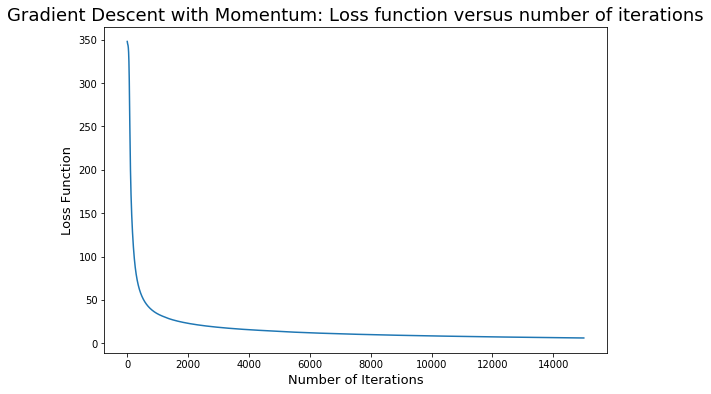

In [22]:
# Using gradient descent to calculate parameter matrix/vectors and record loss_list
W_4_2, b_4_2, V_4_2, c_4_2, loss_4_2 = grad_descent_mom_4(X_4, Y_4, iterations=15000, 
                                                          alpha = 0.3, epsilon = 0.0005, ret_last = True)

# Plot loss function versus number of iterations
plt.figure(figsize=(9,6))
plt.plot(loss_4_2)
plt.title('Gradient Descent with Momentum: Loss function versus number of iterations', fontsize = 18)
plt.xlabel('Number of Iterations',fontsize=13)
plt.ylabel('Loss Function',fontsize=13)
plt.show()

__Using the gradient descent method with momentum, we now have two parameters $\alpha$ and $\epsilon$ to tune compared to basic gradient descent method. By tuning $\alpha$ and $\epsilon$ a little bit, and still running 15,000 iterations, the losses versus number of iterations are plotted above. Compared to the plot of loss funciton versus number of iterations using gradient descent with learning rate of 0.0001, we can see that using momentum methods, the loss function levels off after 4,000 iterations. However, using pure gradient descent method, the loss funciton levels off after 10,000 iterations.__

###   
### 3.6

In [23]:
# Setting up of meshgrid for plotting neural network boundary
x_1_min, x_1_max = -2,2
x_2_min, x_2_max = -2,2
h = 0.01
xx_1, xx_2 = np.meshgrid(np.arange(x_1_min, x_1_max, h), np.arange(x_2_min, x_2_max, h)) 

# Create a matrix of X using hte meshgrid
X_mat_4_1 = np.c_[xx_1.ravel(), xx_2.ravel()]

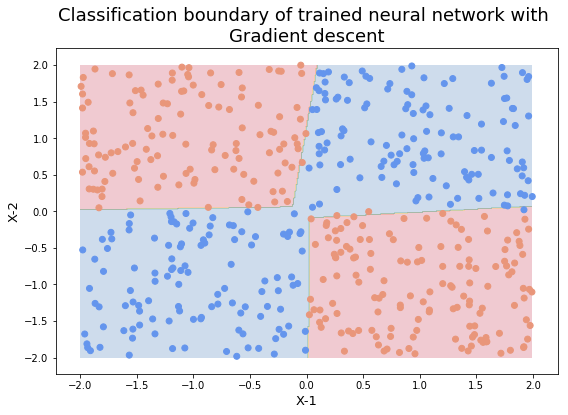

In [24]:
# Calculate the respoonse of meshgrid X and reshape
z_4_1 , _, _ = ff_nn_ReLu(X_mat_4_1, W_4_1, b_4_1, V_4_1, c_4_1)
z_4_1 = np.array([0 if t <0.5 else 1 for t in z_4_1])
z_4_1 = z_4_1.reshape(xx_1.shape)  

# Plot the contour and training examples
plt.figure(figsize=(9,6))
plt.contourf(xx_1, xx_2, z_4_1, cmap=plt.cm.Spectral, alpha = 0.25)
plt.scatter(X_4[:,0], X_4[:,1], c= ['darksalmon' if k == 0 else 'cornflowerblue' for k in Y_4])
plt.title('Classification boundary of trained neural network with \nGradient descent', fontsize = 18)
plt.xlabel('X-1',fontsize=13)
plt.ylabel('X-2',fontsize=13)
plt.show()

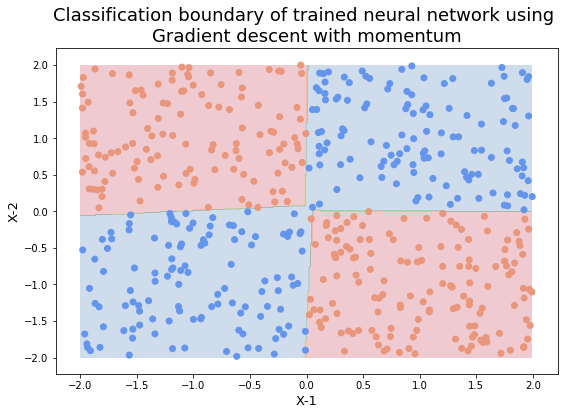

In [25]:
# Calculate the respoonse of meshgrid X and reshape
z_4_2 , _, _ = ff_nn_ReLu(X_mat_4_1, W_4_2, b_4_2, V_4_2, c_4_2)
z_4_2 = np.array([0 if t <0.5 else 1 for t in z_4_2])
z_4_2 = z_4_2.reshape(xx_1.shape)  

# Plot the contour and training examples
plt.figure(figsize=(9,6))
plt.contourf(xx_1, xx_2, z_4_2, cmap=plt.cm.Spectral, alpha = 0.25)
plt.scatter(X_4[:,0], X_4[:,1], c= ['darksalmon' if k == 0 else 'cornflowerblue' for k in Y_4])
plt.title('Classification boundary of trained neural network using \nGradient descent with momentum', fontsize = 18)
plt.xlabel('X-1',fontsize=13)
plt.ylabel('X-2',fontsize=13)
plt.show() 